In [1]:
import FinanceDataReader as fdr #주식데이터 불러오기
import OpenDartReader # 주식데이터 openapi 사용툴
import pandas as pd # 데이터저장
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt # 시각화
import matplotlib.font_manager as fm # 한글폰트 적용
import seaborn as sns # 시각화
font_path = r'C:\Windows\Fonts\NanumBarunGothic.ttf' # 한글폰트 경로

In [2]:
import warnings
warnings.filterwarnings('ignore')
#오류 제거

In [52]:
df = fdr.DataReader(symbol='005930',start='2019')  
# symbol : 종목코드 , 무조건 6자리 사용
# 시작점 미설정시 : 상장일부터
# 종료점 미설정시 : 현재일까지
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2021-11-03,71700,71700,70100,70400,12770428,-0.015385
2021-11-04,71200,71600,70500,70600,11818987,0.002841
2021-11-05,71600,71600,70200,70200,12667743,-0.005666


In [53]:
df['MA'] = df['Close'].rolling(window=5).mean()
df['10MA'] = df['Close'].rolling(window=10).mean()
df['20MA'] = df['Close'].rolling(window=20).mean()
df['60MA'] = df['Close'].rolling(window=60).mean()
df['120MA'] = df['Close'].rolling(window=120).mean()
df


,Open,High,Low,Close,Volume,Change,MA,10MA,20MA,60MA,120MA
Date,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,NaN,NaN,NaN,NaN,NaN
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,NaN,NaN,NaN,NaN,NaN
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,NaN,NaN,NaN,NaN,NaN
2019-01-07,38000,38900,37800,38750,12748997,0.034713,NaN,NaN,NaN,NaN,NaN
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,71700,71700,70100,70400,12770428,-0.015385,70460.0,70430.0,70355.0,74318.333333,77275.000000
2021-11-04,71200,71600,70500,70600,11818987,0.002841,70440.0,70470.0,70320.0,74113.333333,77186.666667
2021-11-05,71600,71600,70200,70200,12667743,-0.005666,70520.0,70450.0,70250.0,73915.000000,77105.000000


In [54]:
df = df.rename(columns={'Open' : '시가',   # 이해하기 쉽게 칼럼을 한글로 변경
                        'High' : '고가',
                        'Low' : '저가',
                        'Close' : '종가',
                        'Volume' : '거래량',
                        'Change' : '등락률',
                           })
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 705 entries, 2019-01-02 to 2021-11-09
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      705 non-null    int64  
 1   고가      705 non-null    int64  
 2   저가      705 non-null    int64  
 3   종가      705 non-null    int64  
 4   거래량     705 non-null    int64  
 5   등락률     705 non-null    float64
 6   MA      701 non-null    float64
 7   10MA    696 non-null    float64
 8   20MA    686 non-null    float64
 9   60MA    646 non-null    float64
 10  120MA   586 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 66.1 KB


In [43]:
df['MA']

Date
1997-10-13        NaN
1997-10-14        NaN
1997-10-15        NaN
1997-10-16        NaN
1997-10-17     1052.4
               ...   
2021-11-03    70460.0
2021-11-04    70440.0
2021-11-05    70520.0
2021-11-08    70660.0
2021-11-09    70460.0
Name: MA, Length: 6000, dtype: float64

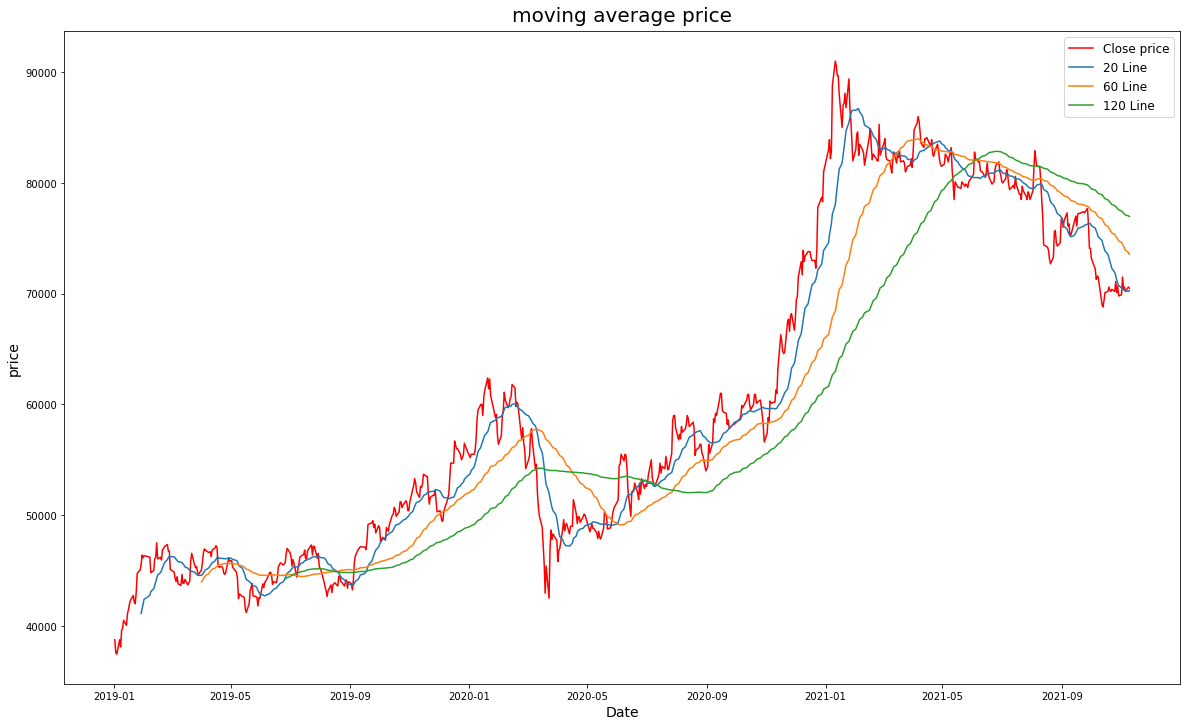

In [60]:
fig = plt.figure(figsize=(20, 12)) 
ax = fig.add_subplot(1,1,1) 

ax.plot(df['종가'], label='Close price', color='r') 
#ax.plot(df['MA'], label='5 Ma')
#ax.plot(df['10MA'], label='10 Ma')
ax.plot(df['20MA'], label='20 Line')
ax.plot(df['60MA'], label='60 Line')
ax.plot(df['120MA'], label='120 Line')

ax.set_title('moving average price', fontsize=20, pad = 10) 
ax.set_ylabel('price', fontsize=14) 
ax.set_xlabel('Date', fontsize=14) 

ax.legend(fontsize=12, loc='best') 

plt.show()

In [36]:
df['고가']

Date
2020-01-02    56000
2020-01-03    56600
2020-01-06    55600
2020-01-07    56400
2020-01-08    57400
              ...  
2021-11-03    71700
2021-11-04    71600
2021-11-05    71600
2021-11-08    70600
2021-11-09    71000
Name: 고가, Length: 459, dtype: int64